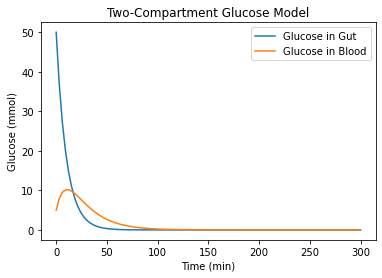

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
from dataclasses import dataclass

@dataclass
class GlucoseModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)

def glucose_two_compartment(t, y, params):
    G_gut, G_blood = y
    
    dG_gut_dt = -(params.k_abs * G_gut * params.V_gut)/params.V_gut
    #DG_gut_dt /= params.V_gut
    dG_blood_dt = ((params.k_abs * G_gut * params.V_gut) - (params.k_clear * G_blood * params.V_blood))/params.V_blood
    #dG_blood_dt /= p.V_blood
    return [dG_gut_dt, dG_blood_dt]

# Define parameters
params = GlucoseModelParams(k_abs=0.1, k_clear=0.05, V_gut=1.5, V_blood=5.0)

# Initial conditions (glucose in gut and blood in mmol)
y0 = [50, 5]  # Example values: 50 mmol in gut, 5 mmol in blood

# Time span for simulation
t_span = (0, 300)  # Simulate for 300 minutes
t_eval = np.linspace(*t_span, 100)

# Solve ODEs
solution = solve_ivp(glucose_two_compartment, t_span, y0, t_eval=t_eval, args=(params,))

# Plot results
import matplotlib.pyplot as plt


plt.plot(solution.t, solution.y[0], label='Glucose in Gut')
plt.plot(solution.t, solution.y[1], label='Glucose in Blood')
plt.xlabel('Time (min)')
plt.ylabel('Glucose (mmol)')
plt.title('Two-Compartment Glucose Model')
plt.legend()
plt.show()

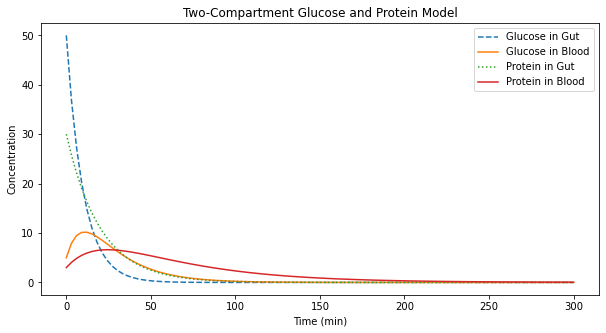

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
from dataclasses import dataclass
import matplotlib.pyplot as plt

@dataclass
class GlucoseModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)

@dataclass
class ProteinModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)

def glucose_two_compartment(t, y, params):
    G_gut, G_blood = y
    
    dG_gut_dt = -(params.k_abs * G_gut * params.V_gut)/params.V_gut
    dG_blood_dt = ((params.k_abs * G_gut * params.V_gut) - (params.k_clear * G_blood * params.V_blood))/params.V_blood
    
    return [dG_gut_dt, dG_blood_dt]

def protein_two_compartment(t, y, params):
    P_gut, P_blood = y
    
    dP_gut_dt = -(params.k_abs * P_gut * params.V_gut)/params.V_gut
    dP_blood_dt = ((params.k_abs * P_gut * params.V_gut) - (params.k_clear * P_blood * params.V_blood))/params.V_blood
    
    return [dP_gut_dt, dP_blood_dt]

# Define parameters
glucose_params = GlucoseModelParams(k_abs=0.1, k_clear=0.05, V_gut=1.5, V_blood=5.0)
protein_params = ProteinModelParams(k_abs=0.05, k_clear=0.02, V_gut=1.5, V_blood=5.0)

# Initial conditions
glucose_y0 = [50, 5]  # Glucose in gut and blood (mmol)
protein_y0 = [30, 3]  # Protein in gut and blood (arbitrary units)

# Time span for simulation
t_span = (0, 300)
t_eval = np.linspace(*t_span, 100)

# Solve ODEs
glucose_solution = solve_ivp(glucose_two_compartment, t_span, glucose_y0, t_eval=t_eval, args=(glucose_params,))
protein_solution = solve_ivp(protein_two_compartment, t_span, protein_y0, t_eval=t_eval, args=(protein_params,))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(glucose_solution.t, glucose_solution.y[0], label='Glucose in Gut', linestyle='dashed')
plt.plot(glucose_solution.t, glucose_solution.y[1], label='Glucose in Blood')
plt.plot(protein_solution.t, protein_solution.y[0], label='Protein in Gut', linestyle='dotted')
plt.plot(protein_solution.t, protein_solution.y[1], label='Protein in Blood')
plt.xlabel('Time (min)')
plt.ylabel('Concentration')
plt.title('Two-Compartment Glucose and Protein Model')
plt.legend()
plt.show()

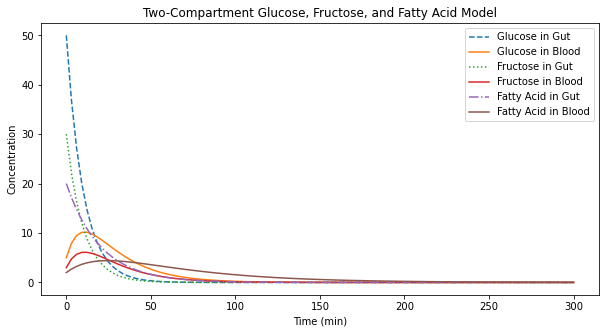

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
from dataclasses import dataclass
import matplotlib.pyplot as plt

@dataclass
class GlucoseModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)

@dataclass
class FructoseModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)

@dataclass
class FattyAcidModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)

def glucose_two_compartment(t, y, params):
    G_gut, G_blood = y
    
    dG_gut_dt = -(params.k_abs * G_gut * params.V_gut) / params.V_gut
    dG_blood_dt = ((params.k_abs * G_gut * params.V_gut) - (params.k_clear * G_blood * params.V_blood)) / params.V_blood
    
    return [dG_gut_dt, dG_blood_dt]

def fructose_two_compartment(t, y, params):
    F_gut, F_blood = y
    
    dF_gut_dt = -(params.k_abs * F_gut * params.V_gut) / params.V_gut
    dF_blood_dt = ((params.k_abs * F_gut * params.V_gut) - (params.k_clear * F_blood * params.V_blood)) / params.V_blood
    
    return [dF_gut_dt, dF_blood_dt]

def fatty_acid_two_compartment(t, y, params):
    FA_gut, FA_blood = y
    
    dFA_gut_dt = -(params.k_abs * FA_gut * params.V_gut) / params.V_gut
    dFA_blood_dt = ((params.k_abs * FA_gut * params.V_gut) - (params.k_clear * FA_blood * params.V_blood)) / params.V_blood
    
    return [dFA_gut_dt, dFA_blood_dt]

# Define parameters
glucose_params = GlucoseModelParams(k_abs=0.1, k_clear=0.05, V_gut=1.5, V_blood=5.0)
fructose_params = FructoseModelParams(k_abs=0.1, k_clear=0.05, V_gut=1.5, V_blood=5.0)
fatty_acid_params = FattyAcidModelParams(k_abs=0.05, k_clear=0.02, V_gut=1.5, V_blood=5.0)

# Initial conditions
glucose_y0 = [50, 5]  # Glucose in gut and blood (mmol)
fructose_y0 = [30, 3]  # Fructose in gut and blood (mmol)
fatty_acid_y0 = [20, 2]  # Fatty acid in gut and blood (mmol)

# Time span for simulation
t_span = (0, 300)
t_eval = np.linspace(*t_span, 100)

# Solve ODEs
glucose_solution = solve_ivp(glucose_two_compartment, t_span, glucose_y0, t_eval=t_eval, args=(glucose_params,))
fructose_solution = solve_ivp(fructose_two_compartment, t_span, fructose_y0, t_eval=t_eval, args=(fructose_params,))
fatty_acid_solution = solve_ivp(fatty_acid_two_compartment, t_span, fatty_acid_y0, t_eval=t_eval, args=(fatty_acid_params,))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(glucose_solution.t, glucose_solution.y[0], label='Glucose in Gut', linestyle='dashed')
plt.plot(glucose_solution.t, glucose_solution.y[1], label='Glucose in Blood')
plt.plot(fructose_solution.t, fructose_solution.y[0], label='Fructose in Gut', linestyle='dotted')
plt.plot(fructose_solution.t, fructose_solution.y[1], label='Fructose in Blood')
plt.plot(fatty_acid_solution.t, fatty_acid_solution.y[0], label='Fatty Acid in Gut', linestyle='dashdot')
plt.plot(fatty_acid_solution.t, fatty_acid_solution.y[1], label='Fatty Acid in Blood')
plt.xlabel('Time (min)')
plt.ylabel('Concentration')
plt.title('Two-Compartment Glucose, Fructose, and Fatty Acid Model')
plt.legend()
plt.show()


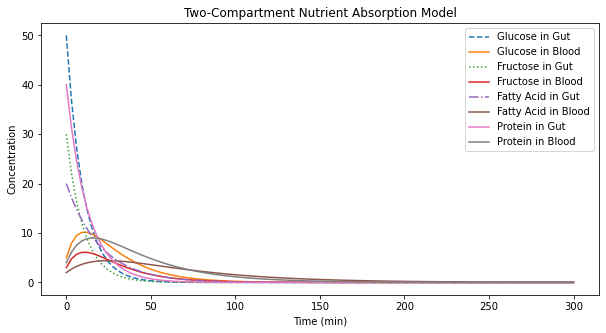

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from dataclasses import dataclass
import matplotlib.pyplot as plt

@dataclass
class GlucoseModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)

@dataclass
class FructoseModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)

@dataclass
class FattyAcidModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)

@dataclass
class ProteinModelParams:
    k_abs: float  # Absorption rate constant (1/min)
    k_clear: float  # Clearance rate constant (1/min)
    V_gut: float  # Volume of gut compartment (L)
    V_blood: float  # Volume of blood compartment (L)

def glucose_two_compartment(t, y, params):
    G_gut, G_blood = y
    dG_gut_dt = -(params.k_abs * G_gut * params.V_gut) / params.V_gut
    dG_blood_dt = ((params.k_abs * G_gut * params.V_gut) - (params.k_clear * G_blood * params.V_blood)) / params.V_blood
    return [dG_gut_dt, dG_blood_dt]

def fructose_two_compartment(t, y, params):
    F_gut, F_blood = y
    dF_gut_dt = -(params.k_abs * F_gut * params.V_gut) / params.V_gut
    dF_blood_dt = ((params.k_abs * F_gut * params.V_gut) - (params.k_clear * F_blood * params.V_blood)) / params.V_blood
    return [dF_gut_dt, dF_blood_dt]

def fatty_acid_two_compartment(t, y, params):
    FA_gut, FA_blood = y
    dFA_gut_dt = -(params.k_abs * FA_gut * params.V_gut) / params.V_gut
    dFA_blood_dt = ((params.k_abs * FA_gut * params.V_gut) - (params.k_clear * FA_blood * params.V_blood)) / params.V_blood
    return [dFA_gut_dt, dFA_blood_dt]

def protein_two_compartment(t, y, params):
    P_gut, P_blood = y
    dP_gut_dt = -(params.k_abs * P_gut * params.V_gut) / params.V_gut
    dP_blood_dt = ((params.k_abs * P_gut * params.V_gut) - (params.k_clear * P_blood * params.V_blood)) / params.V_blood
    return [dP_gut_dt, dP_blood_dt]

# Define parameters
glucose_params = GlucoseModelParams(k_abs=0.1, k_clear=0.05, V_gut=1.5, V_blood=5.0)
fructose_params = FructoseModelParams(k_abs=0.1, k_clear=0.05, V_gut=1.5, V_blood=5.0)
fatty_acid_params = FattyAcidModelParams(k_abs=0.05, k_clear=0.02, V_gut=1.5, V_blood=5.0)
protein_params = ProteinModelParams(k_abs=0.08, k_clear=0.03, V_gut=1.5, V_blood=5.0)

# Initial conditions
glucose_y0 = [50, 5]  # Glucose in gut and blood (mmol)
fructose_y0 = [30, 3]  # Fructose in gut and blood (mmol)
fatty_acid_y0 = [20, 2]  # Fatty acid in gut and blood (mmol)
protein_y0 = [40, 4]  # Protein in gut and blood (mmol)

# Time span for simulation
t_span = (0, 300)
t_eval = np.linspace(*t_span, 100)

# Solve ODEs
glucose_solution = solve_ivp(glucose_two_compartment, t_span, glucose_y0, t_eval=t_eval, args=(glucose_params,))
fructose_solution = solve_ivp(fructose_two_compartment, t_span, fructose_y0, t_eval=t_eval, args=(fructose_params,))
fatty_acid_solution = solve_ivp(fatty_acid_two_compartment, t_span, fatty_acid_y0, t_eval=t_eval, args=(fatty_acid_params,))
protein_solution = solve_ivp(protein_two_compartment, t_span, protein_y0, t_eval=t_eval, args=(protein_params,))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(glucose_solution.t, glucose_solution.y[0], label='Glucose in Gut', linestyle='dashed')
plt.plot(glucose_solution.t, glucose_solution.y[1], label='Glucose in Blood')
plt.plot(fructose_solution.t, fructose_solution.y[0], label='Fructose in Gut', linestyle='dotted')
plt.plot(fructose_solution.t, fructose_solution.y[1], label='Fructose in Blood')
plt.plot(fatty_acid_solution.t, fatty_acid_solution.y[0], label='Fatty Acid in Gut', linestyle='dashdot')
plt.plot(fatty_acid_solution.t, fatty_acid_solution.y[1], label='Fatty Acid in Blood')
plt.plot(protein_solution.t, protein_solution.y[0], label='Protein in Gut', linestyle='solid')
plt.plot(protein_solution.t, protein_solution.y[1], label='Protein in Blood')
plt.xlabel('Time (min)')
plt.ylabel('Concentration')
plt.title('Two-Compartment Nutrient Absorption Model')
plt.legend()
plt.show()
